<b>Project Topic and Data Source

The data source I chose to work with was the census Income Dataset from UCI Machine Learning Repository

Authors:
Barry Becker
Ronny Kohavi

My goal with this data is to clean it, perform analysis on the data, and utilize a Logistic Regression Model to make predictions on categorical dependent variables in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline
df = pd.read_csv('adult.data', header=None)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
py.offline.init_notebook_mode(connected=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


By getting the 'info' on this dataset, we can see the different columns present. 

<b> Data Cleaning

The first step in cleaning this data would be to check for any null values..

In [3]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [4]:
header = {0:'Age', 1:'Workclass', 2:'Exact Income', 3:'Education', 4:'EducationYear', 
          5:'Marital Status', 6:'Occupation', 7:'Relationship',
          8:'Race', 9:'Sex', 10:'Capital Gain',
          11:'Capital Loss', 12:'Hours Worked', 13:'Native Country', 
          14: 'Income'}



In [5]:
df = df.rename(columns = header)



In [6]:
df.head()

,Age,Workclass,Exact Income,Education,EducationYear,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Worked,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


As there are no null values in the dataset and proper headings have supplied, we can proceed with data analysis

<b>Exploratory Data Analysis

<b> To start, I'll create distance plots for the meaningful numeric variables in the set

<b> Distance Plot for Age over the dataset

/var/folders/cf/ysld5mj13l5cjq8_s59y3hdc0000gn/T/ipykernel_59706/2850905334.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age', ylabel='Density'>

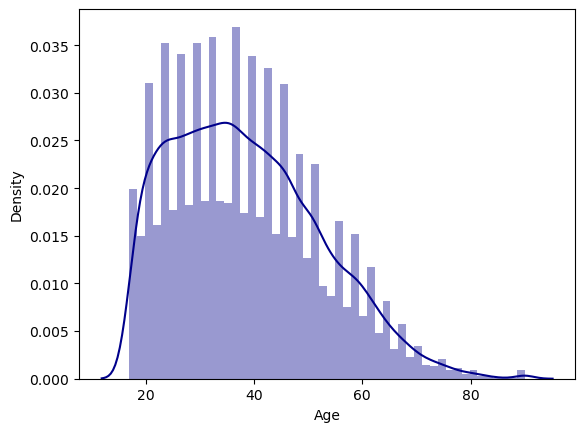

In [9]:
sns.distplot(x=df['Age'], axlabel='Age', color='darkblue')

/var/folders/cf/ysld5mj13l5cjq8_s59y3hdc0000gn/T/ipykernel_59706/3030840617.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Exact Income', ylabel='Density'>

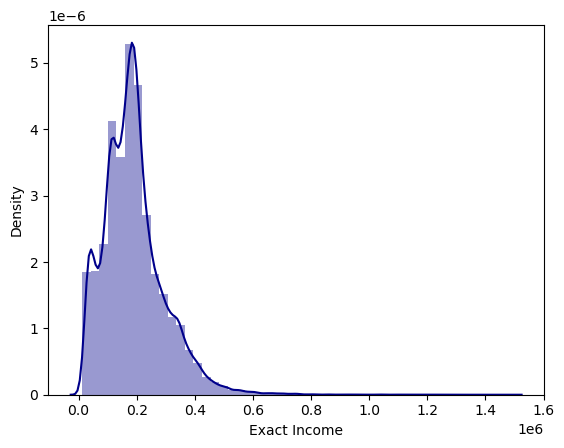

In [10]:
sns.distplot(x=df['Exact Income'], axlabel='Exact Income', color='darkblue')

/var/folders/cf/ysld5mj13l5cjq8_s59y3hdc0000gn/T/ipykernel_59706/90865876.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Education Year', ylabel='Density'>

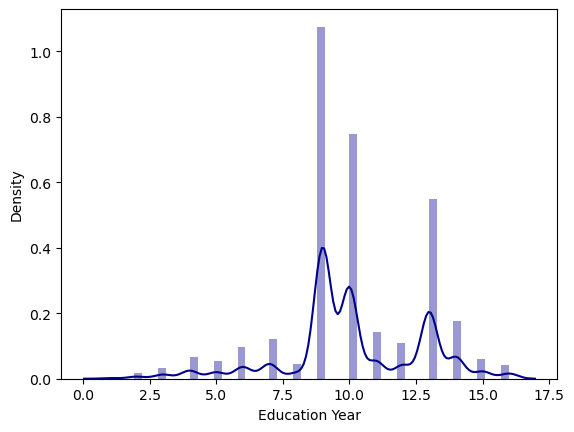

In [11]:
sns.distplot(x=df['EducationYear'], axlabel='Education Year', color='darkblue')

/var/folders/cf/ysld5mj13l5cjq8_s59y3hdc0000gn/T/ipykernel_59706/3531199388.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Hours Worked', ylabel='Density'>

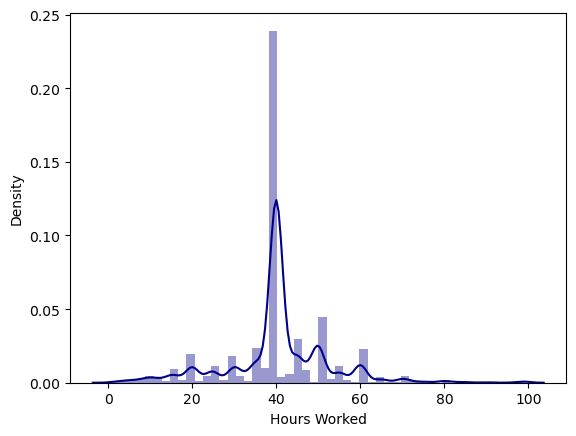

In [12]:
sns.distplot(x=df['Hours Worked'], axlabel='Hours Worked', color='darkblue')

<b> Our next step is seperate the two variables by category, there are numeric and non-numeric variables in this set.

In [13]:
numerical_var = [col for col in df.columns if df[col].dtype != object]
categorical_var = [col for col in df.columns if df[col].dtype == object]


In [14]:
print(numerical_var)

['Age', 'Exact Income', 'EducationYear', 'Capital Gain', 'Capital Loss', 'Hours Worked']


In [15]:
print(categorical_var)

['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native Country', 'Income']


<b> Starting with workclass, I've created a barplot to depict the distribution of income by categorical value

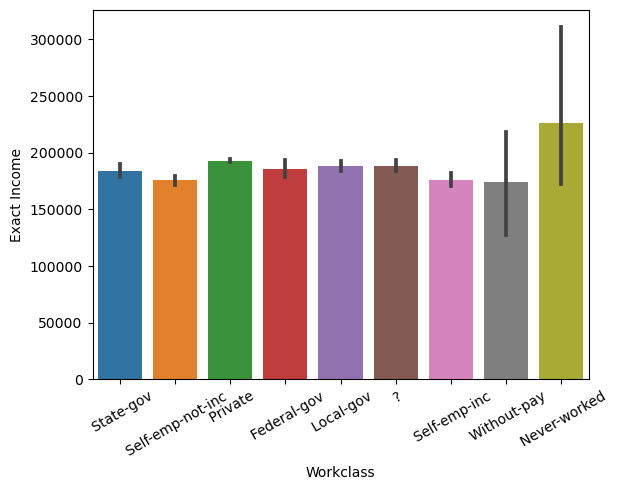

In [16]:
sns.barplot(x = df['Workclass'], y = df['Exact Income'])
plt.xticks(rotation = 30);

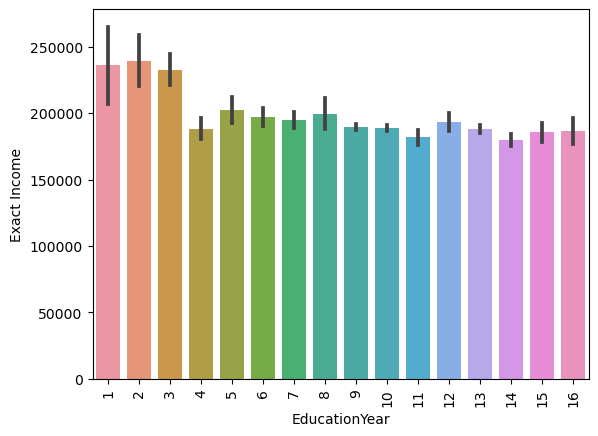

In [17]:
sns.barplot(x = df['EducationYear'], y = df['Exact Income'])
plt.xticks(rotation = 90);

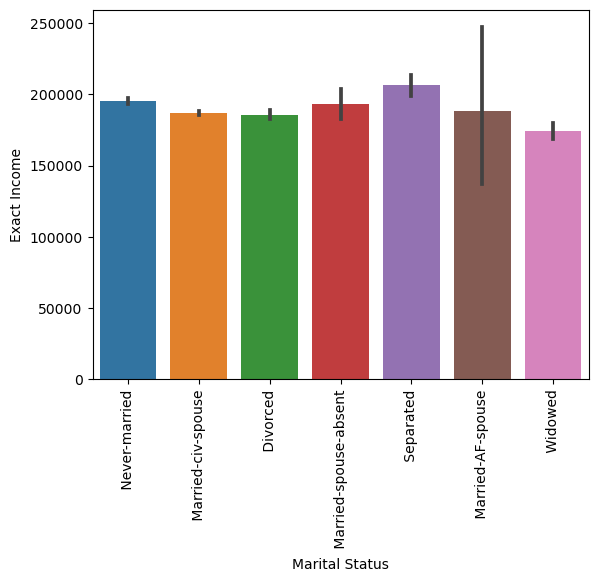

In [18]:
sns.barplot(x = df['Marital Status'], y = df['Exact Income'])
plt.xticks(rotation = 90);

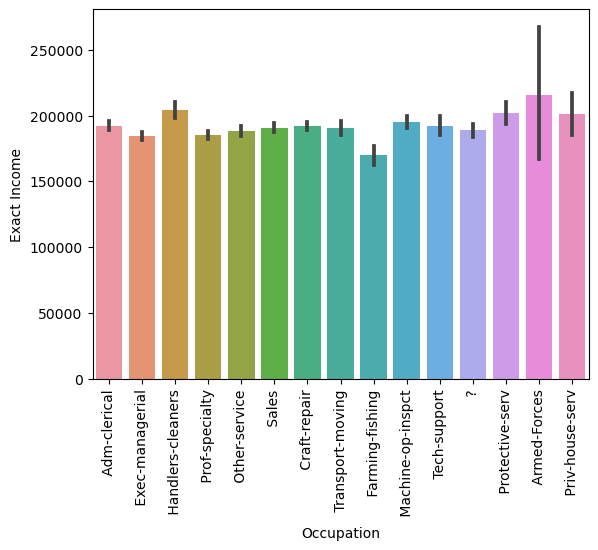

In [19]:
sns.barplot(x = df['Occupation'], y = df['Exact Income'])
plt.xticks(rotation = 90);

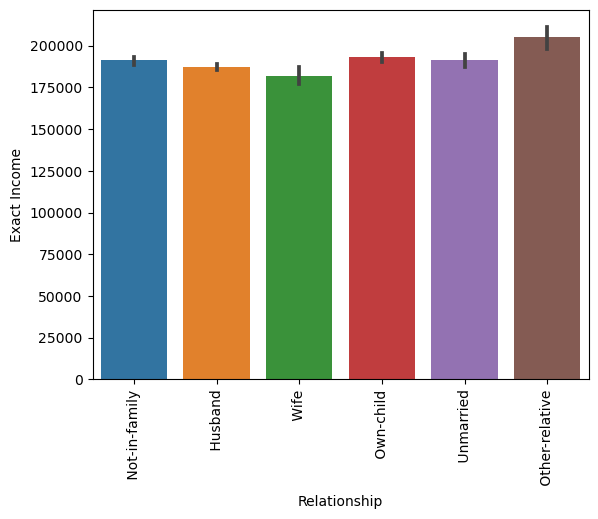

In [20]:
sns.barplot(x = df['Relationship'], y = df['Exact Income'])
plt.xticks(rotation = 90);

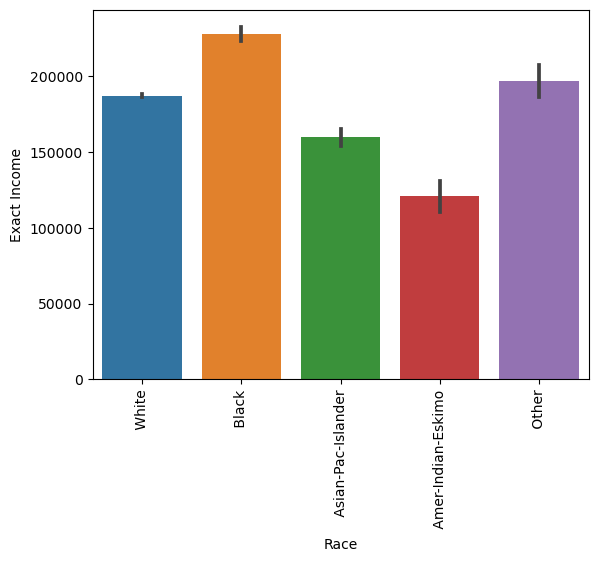

In [21]:
sns.barplot(x = df['Race'], y = df['Exact Income'])
plt.xticks(rotation = 90);

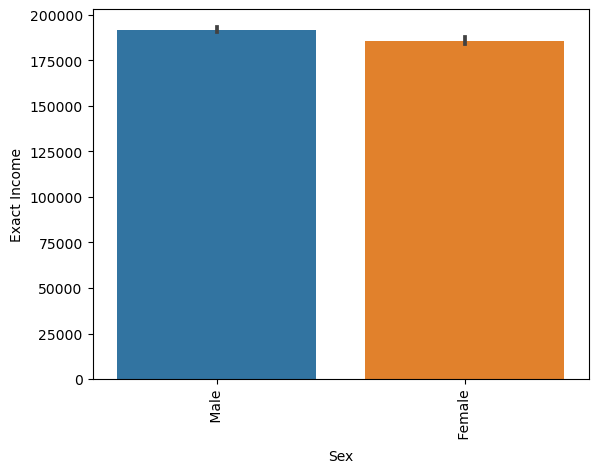

In [22]:
sns.barplot(x = df['Sex'], y = df['Exact Income'])
plt.xticks(rotation = 90);

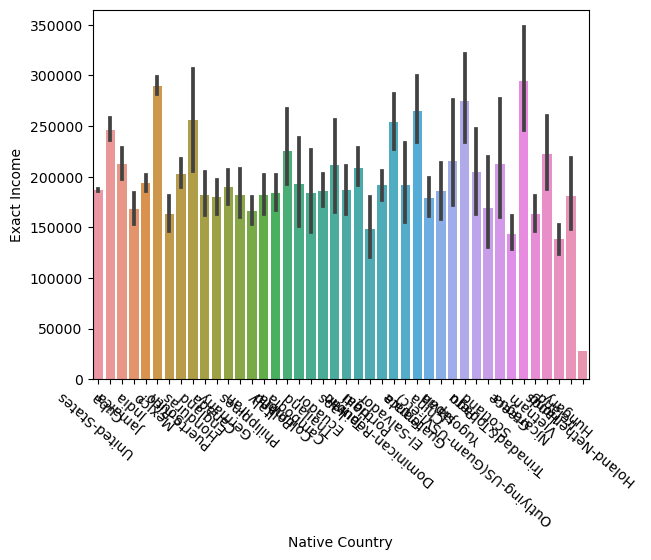

In [23]:
sns.barplot(x = df['Native Country'], y = df['Exact Income'])
plt.xticks(rotation = 500);

<b> Correlation Matrix on Data

/var/folders/cf/ysld5mj13l5cjq8_s59y3hdc0000gn/T/ipykernel_59706/523473972.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

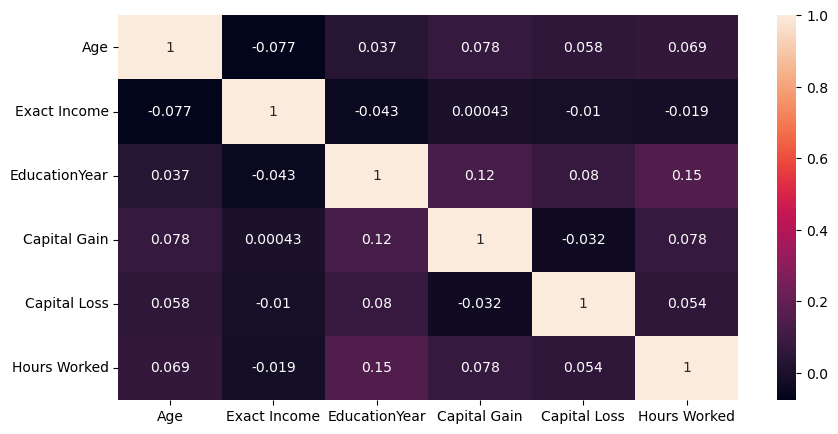

In [24]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True)

<b> Model Approach

In [25]:
le = LabelEncoder() # label encoder 
df['Income']=le.fit_transform(df['Income']) 
df['Sex']=le.fit_transform(df['Sex'])
#Converting 2 columns into binary 
df = pd.get_dummies(df,drop_first=True)
pd.set_option('display.max_columns',100)#to display all columns

In [26]:
scaler = StandardScaler()
train_col_sacle = df[['Age','Exact Income','EducationYear','Hours Worked']]
train_scaler_col = scaler.fit_transform(train_col_sacle)
train_scaler_col = pd.DataFrame(train_scaler_col,columns=train_col_sacle.columns)
df['Age']= train_scaler_col['Age']
df['Exact Income']= train_scaler_col['Exact Income']
df['EducationYear']= train_scaler_col['EducationYear']
df['Hours Worked']= train_scaler_col['Hours Worked']

In [27]:
X = df.drop(['Income'],axis=1)
y = df['Income']

In [28]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.30, random_state=11)

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
predictions = model.predict(X_test)

In [34]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.97      0.88      7490\n           1       0.71      0.26      0.38      2279\n\n    accuracy                           0.80      9769\n   macro avg       0.76      0.61      0.63      9769\nweighted avg       0.79      0.80      0.76      9769\n'

In [35]:

print(confusion_matrix(y_test, predictions))

[[7252  238]
 [1694  585]]


In [37]:
print(accuracy_score(predictions,y_test))

0.8022315487767427


<b> Conclusions

In conclusion, I was able to get the logistic regression model to work on the cencus income dataset. And this resulted in an accuracy score of .80 against the test data. One thing I would take away was I had difficulty getting the logistic regression model to work as I had trouble figuring out the best way to quanitfy the numeric and categorical variables. After discovering the label encoder and scaler resources I was able to figure this issue out. In the future, I would spend more time thinking about the best way to tackle and seperate the data in a given set before trying to make things work.